# EMC5235 - Voltímetro

Bruno M. Pacheco

16100865

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

import seaborn as sns
from scipy.stats import norm

## 3.1 Erro aleatório

/home/bruno/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


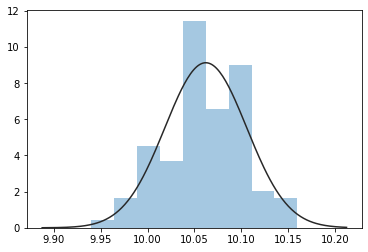

In [16]:
measurements = np.array([10.11, 10.08, 10.13, 10.08, 10.00, 10.00, 10.04, 10.04, 10.14, 10.06, 10.05, 10.08, 10.04, 9.99, 10.12, 10.13, 10.04, 10.03, 10.14, 10.10, 10.04, 10.14, 10.01, 10.06, 10.11, 10.05, 10.16, 10.05, 10.12, 10.09, 10.09, 10.02, 10.10, 10.07, 10.07, 10.02, 10.00, 10.05, 10.02, 10.09, 10.08, 10.06, 10.04, 10.08, 10.06, 10.00, 9.94, 10.10, 10.01, 10.10, 10.08, 10.06, 10.05, 10.11, 10.01, 9.99, 10.05, 10.05, 10.10, 10.03, 10.04, 9.98, 10.10, 10.05, 10.10, 10.11, 10.07, 10.05, 10.05, 10.08, 10.11, 10.08, 10.03, 10.09, 10.06, 9.98, 10.06, 10.08, 10.08, 10.13, 10.01, 10.11, 10.11, 9.97, 10.08, 10.09, 10.06, 10.11, 10.05, 10.02, 10.06, 10.06, 10.08, 9.98, 10.11, 10.02, 10.10, 10.03, 10.00, 10.08, ])

sns.distplot(measurements, hist=True, norm_hist=False, fit=norm, kde=False)
plt.show()

Veja que o eixo vertical está em densidade ao invés de contagem dos valores para que seja comparável com o traço da distribuição normal.

In [7]:
s = np.std(measurements)
print(f'Desvio padrão: {s:.2f} V')
print(f'')

Desvio padrão: 0.04 V



In [8]:
# student's t coefficient for 99 (~100) degrees of freedom, 95%
student = 2.025

re = s * student

print(f"Repetitividade: {re:.2f} V")

Repetitividade: 0.09 V


## 3.2 Tendência e correção

### a)

In [11]:
td = np.mean(measurements) - 10.00

print(f"Tendência: {td:.2f} V")

print(f"Correção: {-td:.2f} V")

Tendência: 0.06 V
Correção: -0.06 V


### b)

In [13]:
measurements = [-10.06, -10.04, -10.05, -10.04, -10.06, -10.07, -10.07, -10.05, -10.11, -10.05, -10.12, -10.08, -10.04, -10.03, -10.06, -10.03, -10.08, -10.09, -10.03, -10.04, -10.04, -10.09, -10.07, -10.11, -10.04, -10.07, -10.08, -10.08, -10.07, -10.07, -10.11, -10.08, -10.04, -9.99, -10.06, -10.14, -10.06, -10.09, -10.09, -10.08, -10.10, -10.08, -10.04, -10.08, -10.09, -10.09, -10.14, -10.10, -10.04, -10.04, -10.04, -10.03, -10.07, -10.03, -10.10, -10.06, -10.01, -10.05, -10.05, -10.03, -10.05, -10.06, -10.09, -10.03, -10.05, -10.05, -10.08, -10.05, -10.00, -10.10, -10.06, -10.04, -10.06, -10.10, -10.07, -10.05, -10.06, -10.07, -10.10, -10.05, -10.07, -10.05, -10.08, -10.05, -10.03, -10.09, -10.05, -10.06, -10.09, -10.04, -10.08, -10.06, -10.10, -10.06, -10.10, -10.06, -10.08, -10.06, -10.12, -10.01, ]

td = np.mean(measurements) - (-10.00)

print('Tensão de -10 V')
print(f"Tendência: {td:.2f} V")
print(f"Correção: {-td:.2f} V")

Tensão de -10 V
Tendência: -0.06 V
Correção: 0.06 V


Aparentemente o voltímetro apresenta tendência simétrica, ou seja, oposta em direções opostas.

### c)

In [17]:
meas = {
    100: [10.11, 10.08, 10.13, 10.08, 10.00, 10.00, 10.04, 10.04, 10.14, 10.06, 10.05, 10.08, 10.04, 9.99, 10.12, 10.13, 10.04, 10.03, 10.14, 10.10, 10.04, 10.14, 10.01, 10.06, 10.11, 10.05, 10.16, 10.05, 10.12, 10.09, 10.09, 10.02, 10.10, 10.07, 10.07, 10.02, 10.00, 10.05, 10.02, 10.09, 10.08, 10.06, 10.04, 10.08, 10.06, 10.00, 9.94, 10.10, 10.01, 10.10, 10.08, 10.06, 10.05, 10.11, 10.01, 9.99, 10.05, 10.05, 10.10, 10.03, 10.04, 9.98, 10.10, 10.05, 10.10, 10.11, 10.07, 10.05, 10.05, 10.08, 10.11, 10.08, 10.03, 10.09, 10.06, 9.98, 10.06, 10.08, 10.08, 10.13, 10.01, 10.11, 10.11, 9.97, 10.08, 10.09, 10.06, 10.11, 10.05, 10.02, 10.06, 10.06, 10.08, 9.98, 10.11, 10.02, 10.10, 10.03, 10.00, 10.08, ],
    16: [10.07, 10.04, 10.05, 10.07, 10.08, 10.11, 10.11, 10.05, 10.11, 10.09, 10.04, 10.07, 10.08, 10.05, 10.05, 10.04, ],
    4: [10.08, 10.08, 10.14, 10.06, ],
}

for w in meas.keys():
    print(f"{w} medições:")
    print(f"Tendência (incerteza): {np.mean(meas[w]) - 10.00:.2f} ({np.std(meas[w]):.2f}) V")
    print('')

100 medições:
Tendência (incerteza): 0.06 (0.04) V

16 medições:
Tendência (incerteza): 0.07 (0.02) V

4 medições:
Tendência (incerteza): 0.09 (0.03) V



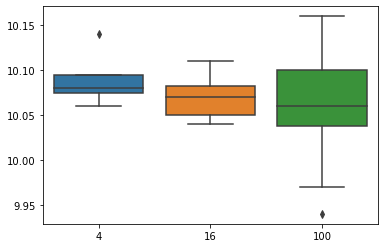

In [18]:
sns.boxplot(data=list(meas.values())[::-1])
plt.xticks(ticks=[0,1,2], labels=[100, 16, 4][::-1])

plt.show()

Vemos que, pela definição dada no enunciado, os valores são consistentes, ainda que as média do resultado de 4 medições esteja marginalmente dentro da faixa dos resultados de 16 medições.

## 3.3 Calibração do voltímetro

Deseja-se calibrar o voltímetro digital para operação dentro da faixa de -15 V à 15 V, visando, à partir da indicação do display, obter uma estimativa mais precisa do valor medido. Para isso, se utilizará dos pesos de referência, que possuem incerteza muito menor que a da balança, podendo, portanto, ser desprezada. 11 pontos serão medidos na faixa de operação, em intervalos de 3 V. 20 medições serão feitas para cada ponto de medição.

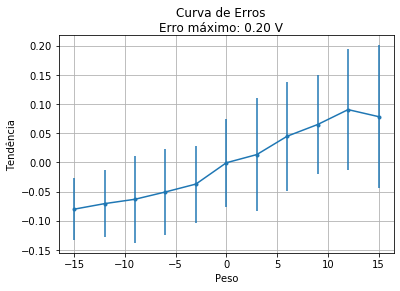

In [29]:
measurements = {
    -15: [-15.10, -15.08, -15.06, -15.10, -15.05, -15.10, -15.10, -15.05, -15.14, -15.07, -15.07, -15.07, -15.06, -15.09, -15.06, -15.04, -15.06, -15.11, -15.08, -15.11, ],
    -12: [-12.03, -12.09, -12.06, -12.06, -12.02, -12.08, -12.12, -12.10, -12.05, -12.09, -12.02, -12.10, -12.08, -12.09, -12.09, -12.07, -12.06, -12.09, -12.06, -12.05, ],
    -9: [-9.05, -9.06, -9.08, -9.08, -9.09, -9.02, -9.04, -9.11, -9.06, -9.11, -9.05, -9.07, -8.98, -9.13, -9.07, -9.02, -9.02, -9.07, -9.09, -9.06, ],
    -6: [-6.08, -6.02, -6.07, -6.10, -6.09, -6.05, -6.08, -5.97, -5.98, -6.04, -6.06, -6.05, -6.06, -6.03, -6.05, -6.07, -6.09, -6.01, -6.04, -6.07, ],
    -3: [-2.99, -3.05, -3.11, -3.02, -3.00, -2.99, -3.03, -3.02, -3.03, -3.10, -3.04, -3.01, -3.03, -3.04, -3.02, -3.06, -3.03, -3.05, -3.05, -3.07, ],
    0: [-0.05, 0.00, 0.00, -0.06, 0.04, 0.02, -0.03, 0.01, 0.07, -0.02, 0.00, 0.03, -0.02, 0.01, 0.04, -0.03, -0.04, -0.05, 0.03, 0.04, ],
    3: [3.00, 2.95, 2.98, 2.96, 3.06, 3.05, 3.04, 2.94, 3.06, 3.04, 3.00, 3.00, 2.99, 3.05, 3.10, 2.98, 2.98, 2.99, 3.10, 3.00, ],
    6: [6.04, 6.10, 5.98, 6.05, 6.09, 6.02, 6.00, 6.07, 6.10, 6.04, 6.04, 6.13, 6.00, 6.03, 6.01, 6.04, 6.01, 5.99, 6.03, 6.13, ],
    9: [9.05, 9.02, 9.07, 9.01, 9.16, 9.11, 9.04, 9.02, 9.03, 9.05, 9.02, 9.02, 9.09, 9.06, 9.10, 9.08, 9.07, 9.11, 9.07, 9.12, ],
    12: [12.06, 12.06, 12.07, 12.06, 12.16, 12.05, 12.04, 12.07, 12.15, 12.08, 12.14, 12.08, 12.06, 12.12, 12.11, 12.09, 12.01, 12.08, 12.23, 12.09, ],
    15: [15.09, 15.17, 15.09, 15.07, 15.14, 15.01, 15.07, 15.09, 15.01, 15.06, 15.13, 15.07, 15.04, 15.17, 15.00, 15.06, 15.16, 15.09, 14.95, 15.10, ],
}

assert all([len(ms)==20 for ms in measurements.values()])

student = 2.140

td_meas = list()
re_meas = list()
w_range = range(-15,15+1,3)
for w in w_range:
    ms = measurements[w]  # measurements

    re_meas.append(np.std(ms) * student)
    td_meas.append(np.mean(ms) - w)

err_max = np.max([re + td for re, td in zip(re_meas, td_meas)])

plt.errorbar(w_range, td_meas, yerr=re_meas, marker='.')
plt.suptitle(f'Curva de Erros\nErro máximo: {err_max:.2f} V')

plt.xlabel('Peso')
plt.ylabel('Tendência')

plt.grid()

plt.show()

## 3.4 Determinação de uma tensão conhecida

### a)

O valor selecionado foi de 1,25 V.

In [40]:
def measure(ind):
    meas_i = int((ind + 15) / 3)

    td = ((ind + 15) / 3 - meas_i) * (td_meas[meas_i + 1] - td_meas[meas_i]) + td_meas[meas_i]
    c = - td

    re = ((ind + 15) / 3 - meas_i) * (re_meas[meas_i + 1] - re_meas[meas_i]) + re_meas[meas_i]
    
    return c, re

In [42]:
new_m = 1.31

c, re = measure(new_m)

print(f"Massa conhecida (medição única): {new_m + c:.2f} \u00B1{re:.2f} V")

Massa conhecida (medição única): 1.30 ±0.08 V


Vemos que o valor de referência está dentro da faixa que representa a medição.

### b)

In [44]:
new_ms = [1.29, 1.22, 1.25, 1.14, 1.27, 1.31, 1.28, 1.22, 1.29, 1.22, 1.26, 1.29, 1.23, 1.31, 1.27, 1.31, 1.24, 1.24, 1.22, 1.29, ]

print(f"Massa conhecida (20 medições): {np.mean(new_ms) + c:.2f} \u00B1{re:.2f} V")

Massa conhecida (20 medições): 1.25 ±0.08 V


Valor de referência dentro da faixa resultante.

### c)

In [48]:
new_ms = [1.31, 1.28, 1.23, 1.34, 1.22, 1.21, 1.29, 1.22, 1.27, 1.31, 1.31, 1.26, 1.26, 1.24, 1.28, 1.21, 1.26, 1.26, 1.26, 1.25, 1.37, 1.29, 1.22, 1.28, 1.27, 1.24, 1.21, 1.23, 1.27, 1.28, ]

print(f"Massa conhecida (erro máximo): {np.mean(new_ms):.2f} \u00B1{err_max:.2f} V")

Massa conhecida (erro máximo): 1.26 ±0.20 V


Novamente, dentro da faixa.

### d)

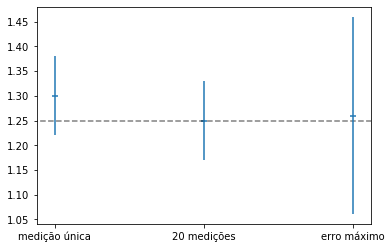

In [49]:
plt.hlines(y=[1.25], xmin=-1, xmax=4, linestyle='--', alpha=0.5)
new_ms_m = [1.30, 1.25, 1.26]
new_ms_errs = [0.08, 0.08, 0.20]
plt.errorbar(x=['medição única', '20 medições', 'erro máximo'], y=new_ms_m, yerr=new_ms_errs, fmt='none')
plt.scatter(x=['medição única', '20 medições', 'erro máximo'], y=new_ms_m, marker='_')
# plt.plot(x=['medição única', '20 medições', 'erro máximo'], y=[1250, 1250, 1250])

plt.show()

São consistentes, mas é visível a desvantagem de utilizar o erro máximo.

## 3.5 Determinação da soma de tensões

30 medições serão realizadas para cada cenário.

### a)

In [53]:
meas_1 = [6.39, 6.45, 6.39, 6.50, 6.31, 6.40, 6.40, 6.46, 6.41, 6.41, 6.44, 6.34, 6.37, 6.44, 6.41, 6.36, 6.39, 6.35, 6.43, 6.34, 6.37, 6.37, 6.40, 6.38, 6.41, 6.38, 6.25, 6.39, 6.34, 6.41, ]

avg = np.mean(meas_1)

c, re = measure(avg)

m1 = avg + c
u1 = re

print(f"Medição: {m1:.2f} \u00B1{u1:.2f} V")

Medição: 6.34 ±0.09 V


### b)

In [55]:
meas_2 = [3.63, 3.70, 3.65, 3.69, 3.75, 3.66, 3.68, 3.62, 3.66, 3.65, 3.64, 3.67, 3.70, 3.68, 3.64, 3.71, 3.64, 3.68, 3.66, 3.63, 3.64, 3.65, 3.69, 3.72, 3.64, 3.70, 3.72, 3.76, 3.73, 3.63, ]

avg = np.mean(meas_2)

c, re = measure(avg)

m2 = avg + c
u2 = re

print(f"Medição: {m2:.2f} \u00B1{u2:.2f} V")

Medição: 3.65 ±0.10 V


### c)

In [56]:
m = m1 + m2
u = np.sqrt(u1**2 + u2**2)

print(f"Soma: {m:.2f} \u00B1{u:.2f} V")

Soma: 10.00 ±0.13 V


### d)

In [57]:
sum_meas = [10.12, 10.06, 10.09, 10.08, 10.06, 10.04, 10.12, 10.06, 10.12, 10.02, 10.09, 10.08, 10.04, 10.06, 10.09, 10.09, 10.11, 10.06, 10.08, 10.00, 10.08, 10.10, 10.09, 10.09, 10.06, 10.06, 10.10, 10.00, 10.06, 10.10, ]

avg = np.mean(sum_meas)

c, re = measure(avg)

m = avg + c
u = re

print(f"Medição: {m:.2f} \u00B1{u:.2f} V")

Medição: 10.00 ±0.09 V


São resultados bastante próximos, mas a incerteza associada à medição direta é significativamente inferior.